In [331]:
data = pd.read_pickle("finaldata.pkl")
data.head()

,file_name,bpm,key,scale,key_strength,mel_vector,spectral_centroid,mood
0,Lobo Loco - Blues about Mary Roose (ID 1153).mp3,136.496384,D,minor,0.857395,"[-54.037674, -57.166718, -59.026573, -55.1363,...",1362.012894,RM
1,Raya Brass Band - Banetero Kolo.mp3,163.957520,F,major,0.691950,"[-38.56755, -39.3003, -26.486628, -17.95028, -...",2397.921051,EH
2,Jazzafari - 3 in Raw.mp3,124.108849,F#,minor,0.795335,"[-17.787302, -12.299484, -14.487415, -26.54537...",4164.553630,EH
3,LASERS - Paris.mp3,140.006027,F,major,0.877331,"[-33.98225, -33.076958, -39.938587, -47.852196...",2470.489356,RM
4,Tipsy Oxcart - Bairski Vez.mp3,96.518738,D,minor,0.860609,"[-20.63337, -12.989651, -13.519527, -14.349524...",2448.152327,EH


In [333]:
# Re-import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Convert 'mel_vector' into a NumPy array ---
X_mel = np.stack(data["mel_vector"].values)  # Converts lists into a 2D NumPy array

#Extract Numeric Features (Drop Non-Numeric) ---
X_numeric = data.drop(columns=["file_name", "mel_vector", "key", "scale", "mood"]).values  # Convert remaining numeric values

# One-Hot Encode 'key' and 'scale' ---
encoder = OneHotEncoder(sparse_output=False, drop="first")  # Drop first category to avoid multicollinearity
encoded_array = encoder.fit_transform(data[["key", "scale"]])

# Label Encode 'mood' ---
label_encoder = LabelEncoder()
mood_encoded = label_encoder.fit_transform(data["mood"]).reshape(-1, 1)  # Reshape to column vector

# Concatenate All Features into One Array ---
X_final = np.concatenate([X_mel, X_numeric, encoded_array, mood_encoded], axis=1)

# Print the Final Shape ---
print("Final Data Shape:", X_final.shape)  # Expected (num_samples, num_features)

# Create column names for mel_vector
mel_columns = [f"mel_{i}" for i in range(X_mel.shape[1])]

# Extract column names for numeric features (excluding removed categorical ones)
numeric_columns = data.drop(columns=["file_name", "mel_vector", "key", "scale", "mood"]).columns.tolist()

# Extract column names for one-hot encoded features
onehot_columns = encoder.get_feature_names_out(["key", "scale"]).tolist()

# Final column names
all_columns = mel_columns + numeric_columns + onehot_columns + ["mood_encoded"]

# Convert X_final into a DataFrame with correct column names
data = pd.DataFrame(X_final, columns=all_columns)

print(data.head())  # Now column names should be restored




Final Data Shape: (388, 578832)
       mel_0      mel_1      mel_2      mel_3      mel_4      mel_5  \
0 -54.037674 -57.166718 -59.026573 -55.136299 -50.908875 -64.827682   
1 -38.567551 -39.300301 -26.486628 -17.950279 -25.643404 -24.181005   
2 -17.787302 -12.299484 -14.487415 -26.545372 -28.548450 -32.060593   
3 -33.982250 -33.076958 -39.938587 -47.852196 -60.408737 -80.000000   
4 -20.633369 -12.989651 -13.519527 -14.349524 -12.611603 -14.628361   

       mel_6      mel_7      mel_8      mel_9  ...  key_C  key_C#  key_D  \
0 -58.468765 -65.964752 -66.397629 -71.778351  ...    0.0     0.0    1.0   
1 -21.111813 -13.479347 -16.959869 -22.418716  ...    0.0     0.0    0.0   
2 -21.834082 -23.816069 -27.979692 -22.462912  ...    0.0     0.0    0.0   
3 -80.000000 -80.000000 -80.000000 -50.252842  ...    0.0     0.0    0.0   
4 -13.972839 -12.638098 -15.904167 -13.446779  ...    0.0     0.0    1.0   

   key_E  key_Eb  key_F  key_F#  key_G  scale_minor  mood_encoded  
0    0.0     0.0

In [336]:
#data=pd.DataFrame(X_final)

In [36]:
data

,mel_0,mel_1,mel_2,mel_3,mel_4,mel_5,mel_6,mel_7,mel_8,mel_9,...,key_C,key_C#,key_D,key_E,key_Eb,key_F,key_F#,key_G,scale_minor,mood_encoded
0,-54.037674,-57.166718,-59.026573,-55.136299,-50.908875,-64.827682,-58.468765,-65.964752,-66.397629,-71.778351,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
1,-38.567551,-39.300301,-26.486628,-17.950279,-25.643404,-24.181005,-21.111813,-13.479347,-16.959869,-22.418716,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-17.787302,-12.299484,-14.487415,-26.545372,-28.548450,-32.060593,-21.834082,-23.816069,-27.979692,-22.462912,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-33.982250,-33.076958,-39.938587,-47.852196,-60.408737,-80.000000,-80.000000,-80.000000,-80.000000,-50.252842,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
4,-20.633369,-12.989651,-13.519527,-14.349524,-12.611603,-14.628361,-13.972839,-12.638098,-15.904167,-13.446779,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,-18.827925,-25.420973,-36.458878,-23.009115,-15.522147,-17.507339,-15.555164,-12.159800,-12.208364,-11.049828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
384,-58.460739,-75.745544,-80.000000,-80.000000,-80.000000,-80.000000,-59.827812,-58.938789,-79.221413,-80.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
385,-14.860222,-8.845776,-7.370272,-7.466953,-7.319521,-7.247381,-7.438055,-7.466105,-7.223051,-7.063437,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
386,-48.618004,-45.304626,-47.979183,-46.861000,-50.708630,-52.234360,-50.603142,-52.647766,-54.235954,-56.972572,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0


In [11]:
data["mood_encoded"]

0      3.0
1      0.0
2      0.0
3      3.0
4      0.0
      ... 
383    1.0
384    1.0
385    3.0
386    2.0
387    1.0
Name: mood_encoded, Length: 388, dtype: float64

In [17]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


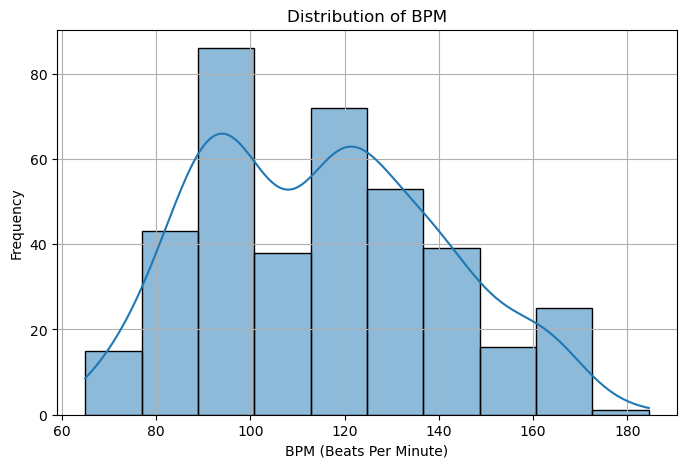

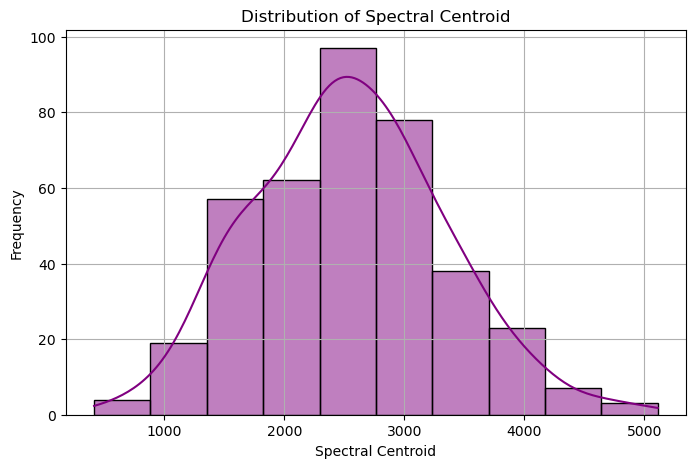

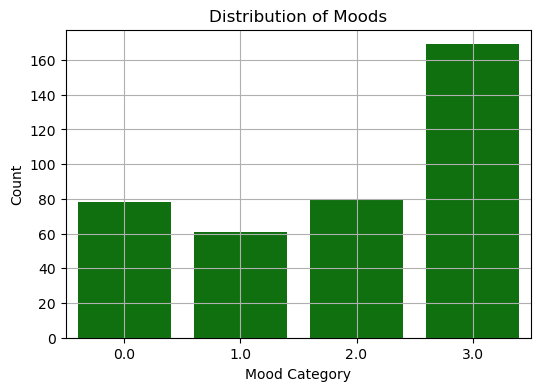

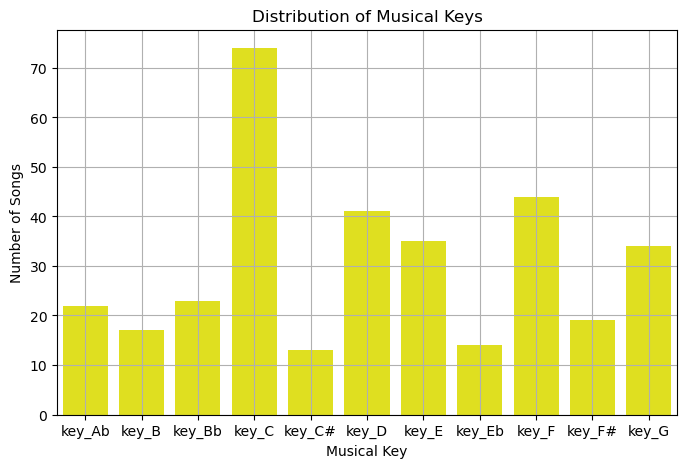

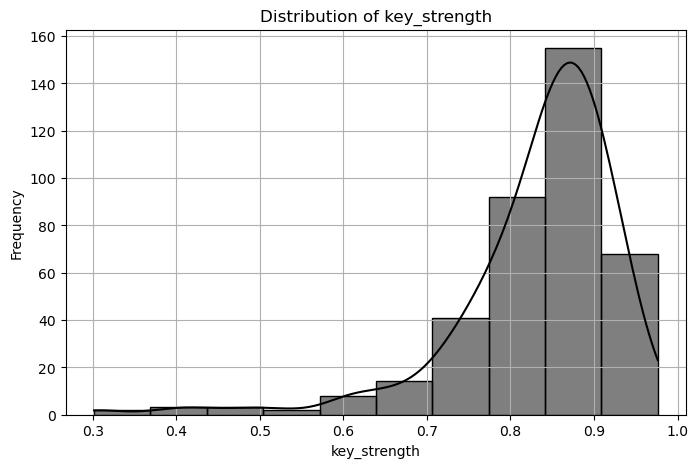

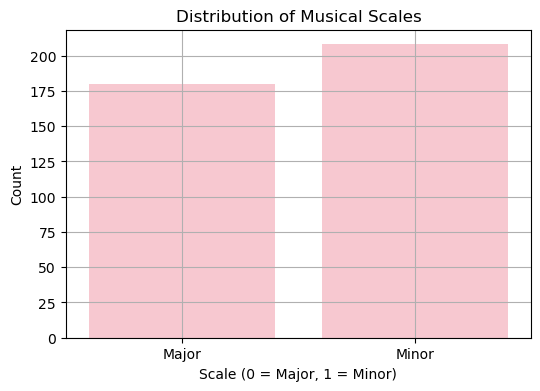

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.DataFrame(data)

# --- Visualization 1: Histogram of BPM ---
plt.figure(figsize=(8, 5))
sns.histplot(df["bpm"], bins=10, kde=True)
plt.xlabel("BPM (Beats Per Minute)")
plt.ylabel("Frequency")
plt.title("Distribution of BPM")
plt.grid(True)
plt.show()

# --- Visualization: Histogram of Spectral Centroid ---
plt.figure(figsize=(8, 5))
sns.histplot(df["spectral_centroid"], bins=10, kde=True, color="purple")
plt.xlabel("Spectral Centroid")
plt.ylabel("Frequency")
plt.title("Distribution of Spectral Centroid")
plt.grid(True)
plt.show()

# --- Visualization 3: Mood Distribution ---
plt.figure(figsize=(6, 4))
sns.countplot(x=df["mood_encoded"], color="green")
plt.xlabel("Mood Category")
plt.ylabel("Count")
plt.title("Distribution of Moods")
plt.grid(True)
plt.show()

# --- Visualization 4: Key Occurrence ---
keys = ["key_Ab","key_B","key_Bb","key_C","key_C#","key_D","key_E",	"key_Eb","key_F","key_F#","key_G"]
key_counts = df[keys].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=key_counts.index, y=key_counts.values, color="yellow")
plt.xlabel("Musical Key")
plt.ylabel("Number of Songs")
plt.title("Distribution of Musical Keys")
plt.grid(True)
plt.show()


# --- Visualization 4: Key Occurrence ---
plt.figure(figsize=(8, 5))
sns.histplot(df["key_strength"], bins=10, kde=True, color = "black")
plt.xlabel("key_strength")
plt.ylabel("Frequency")
plt.title("Distribution of key_strength")
plt.grid(True)
plt.show()

# --- Visualization: Distribution of Scale (Major vs. Minor) ---
plt.figure(figsize=(6, 4))
sns.countplot(x=df["scale_minor"], color="pink")
plt.xlabel("Scale (0 = Major, 1 = Minor)")
plt.ylabel("Count")
plt.title("Distribution of Musical Scales")
plt.xticks([0, 1], ["Major", "Minor"])
plt.grid(True)
plt.show()



In [335]:
from tabulate import tabulate
import pandas as pd

# Convert mood column into a DataFrame
mood_df = data[["mood_encoded"]]  # Double brackets ensure it's a DataFrame

mood_counts = data["mood_encoded"].value_counts().reset_index()
mood_counts.columns = ["Mood", "Count"]

print(tabulate(mood_counts, headers="keys", tablefmt="grid"))


+----+--------+---------+
|    |   Mood |   Count |
+====+========+=========+
|  0 |      3 |     169 |
+----+--------+---------+
|  1 |      2 |      80 |
+----+--------+---------+
|  2 |      0 |      78 |
+----+--------+---------+
|  3 |      1 |      61 |
+----+--------+---------+


In [17]:
import ace_tools as tools


ModuleNotFoundError: No module named 'ace_tools'

In [337]:
from sklearn.decomposition import PCA   # PCA
from sklearn.preprocessing import StandardScaler  # Standardization
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # Encoding categorical variables


In [340]:
### --- Step 1: Drop 'mood_encoded' (target variable) from features ---
X_features = data.drop(columns=["mood_encoded"]).values  # Keep only input features

# --- Step 2: Standardize the Data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)  # Standardize all features

# --- Step 3: Fit PCA without specifying components to determine explained variance ---
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# --- Step 4: Compute Cumulative Explained Variance ---
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# --- Step 5: Find the Optimal Number of Components (95% variance) ---
n_components_optimal = np.argmax(explained_variance >= 0.95) + 1  # +1 since Python is 0-based

print(f"Optimal number of components: {n_components_optimal}")

# --- Step 6: Re-run PCA with Optimal Number of Components ---
pca = PCA(n_components=n_components_optimal)
X_pca_optimal = pca.fit_transform(X_scaled)

# --- Step 7: Print Final Shape ---
print("Reduced Data Shape after PCA:", X_pca_optimal.shape)  # (num_samples, optimal_components)



Optimal number of components: 339
Reduced Data Shape after PCA: (388, 339)


In [341]:
data2=pd.DataFrame(X_pca_optimal)

In [214]:
data2

,0,1,2,3,4,5,6,7,8,9,...,329,330,331,332,333,334,335,336,337,338
0,358.453295,-54.006666,-39.956962,-42.944491,63.810033,13.892309,4.103070,-9.813030,4.550385,-29.565561,...,-18.766962,-14.097900,-39.409401,5.764353,-23.293253,64.287506,-31.642294,8.641679,56.436031,1.948032
1,-348.877594,-47.217486,-26.131870,-3.069293,-53.558296,41.175918,44.360277,-16.873600,-41.106899,-27.880088,...,-0.668585,31.223333,-42.337599,-3.803016,-13.719618,-23.558029,-1.658425,-47.684807,7.152533,14.779750
2,-495.638073,136.426190,-53.248646,59.647769,13.389605,64.386886,-39.261976,-10.337535,-3.003828,-10.723646,...,-5.262511,-2.900317,-1.992996,-1.223244,0.529061,-10.201849,-3.305520,-0.783317,5.620920,-2.812838
3,-135.242330,-148.026545,-33.930497,-81.095534,26.012442,-15.442195,-79.879714,35.908203,45.671647,-43.521046,...,51.230787,-44.104933,-3.958956,-29.137010,-72.519293,-65.779437,-58.067464,-21.524634,31.653790,25.008379
4,-335.230119,-61.175349,-90.623428,20.184438,23.967137,-40.497371,32.463972,54.374479,-70.082876,-43.258195,...,-14.242563,5.669562,4.663787,-60.576444,-30.100472,-2.160774,3.313997,5.741366,-40.130399,-70.099926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,-282.304870,147.539588,58.663817,18.613651,117.391565,-60.582806,47.075217,-20.143167,-25.845398,-94.005927,...,-5.853215,3.266035,10.833487,-8.451427,-5.026195,-11.719326,-5.640270,6.285194,-6.305819,0.441839
384,406.868480,101.797021,16.604980,26.849907,35.008277,-14.964751,-16.836607,-15.012927,-9.098815,-18.365149,...,12.766029,44.584351,-1.790712,-36.957330,-73.284170,-65.513814,41.268837,50.111435,44.759889,47.887263
385,180.054222,-13.959685,-53.261258,30.004611,7.341169,15.702349,147.912725,74.448830,-7.779666,-39.768028,...,11.619531,37.158428,47.173544,16.820889,51.800257,9.819785,42.920489,55.013641,-41.087133,-75.166671
386,57.860482,-28.195745,-11.606945,64.180126,97.195307,-20.979343,-15.861135,-118.983628,44.621414,0.615842,...,4.615651,14.556761,-5.574979,-5.563004,-9.230284,-9.708965,-6.550540,-20.548385,-26.644785,-2.373288


In [346]:
Y = data["mood_encoded"].values  # Select last 3 columns (one-hot encoded mood)
# --- Step 1: Prepare Data ---
X = data2.values  # PCA-transformed features

In [348]:
X_train.shape[1]

339

In [350]:
len(np.unique(Y))

4

Final model: change in optimizer(adam -> SGD; add initializer)

In [766]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split

#Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

#Neural Network Model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer (feature size from PCA)
    layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.HeNormal()),  # First hidden layer
    layers.Dropout(0.3),  # Regularization to prevent overfitting
    layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.HeNormal()),  # Second hidden layer
    layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.HeNormal()),  # Third hidden layer
    layers.Dense(len(np.unique(Y)), activation="softmax")  # Output layer (for multi-class classification)
])

#Compile Model
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#Train
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

#Test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2306 - loss: 38.5009 - val_accuracy: 0.3974 - val_loss: 1.5809
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3699 - loss: 2.5240 - val_accuracy: 0.4359 - val_loss: 1.4044
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3996 - loss: 1.7482 - val_accuracy: 0.4103 - val_loss: 1.2882
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4428 - loss: 1.5047 - val_accuracy: 0.3974 - val_loss: 1.3059
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4424 - loss: 1.5096 - val_accuracy: 0.3974 - val_loss: 1.2946
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4741 - loss: 1.3139 - val_accuracy: 0.4231 - val_loss: 1.3082
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4639 - loss: 1.3113 - val_accuracy: 0.4359 - val_loss: 1.2901
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4243 - loss: 1.3521 - val_accuracy: 0.4231 - val_loss: 1.3134
Epoch 

In [498]:
# Get validation accuracy and loss from history
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Find best epoch (based on highest validation accuracy or lowest validation loss)
best_epoch_acc = np.argmax(val_acc) + 1
best_epoch_loss = np.argmin(val_loss) + 1

print(f"Best Epoch based on Validation Accuracy: {best_epoch_acc} (val_accuracy = {val_acc[best_epoch_acc - 1]:.4f})")
print(f"Best Epoch based on Validation Loss: {best_epoch_loss} (val_loss = {val_loss[best_epoch_loss - 1]:.4f})")


Best Epoch based on Validation Accuracy: 6 (val_accuracy = 0.4359)
Best Epoch based on Validation Loss: 15 (val_loss = 1.3398)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# --- Step 2: Define Neural Network Model ---
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer (feature size from PCA)
    layers.Dense(64, activation="relu"),  # First hidden layer
    layers.Dropout(0.3),  # Regularization to prevent overfitting
    layers.Dense(32, activation="relu"),  # Second hidden layer
    layers.Dense(16, activation="relu"),  # Third hidden layer
    layers.Dense(len(np.unique(Y)), activation="softmax")  # Output layer (for multi-class classification)
])

# --- Step 3: Compile Model ---
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# --- Step 4: Train Model ---
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# --- Step 5: Evaluate Model ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


In [656]:
from sklearn.metrics import silhouette_score

hard_clusters = np.argmax(u, axis=0)
sil_score = silhouette_score(X_pca_optimal, hard_clusters)
print(f"Silhouette Score (approximate): {sil_score:.4f}")


Silhouette Score (approximate): -0.0276


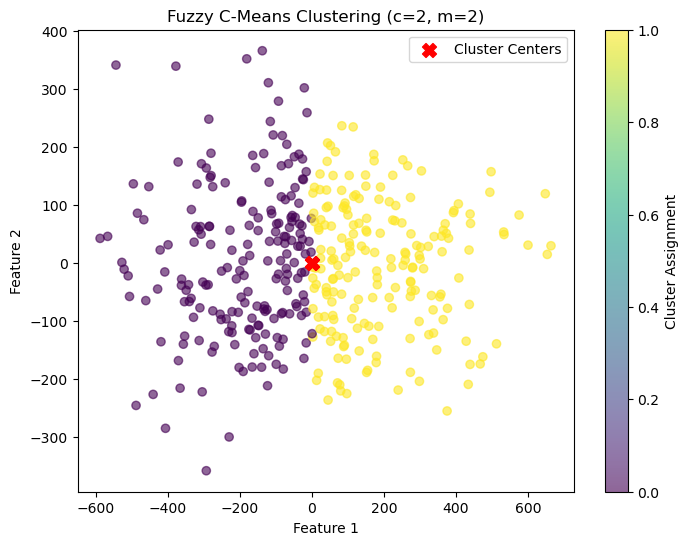

Silhouette Score (approximate): 0.0668

FPC across different values of m:
FPC with m=1.5: 0.5000
FPC with m=2.0: 0.5000
FPC with m=2.5: 0.5000

FPC across different numbers of clusters:
Clusters: 2, FPC: 0.5000
Clusters: 3, FPC: 0.3333
Clusters: 4, FPC: 0.2500
Clusters: 5, FPC: 0.2000
Clusters: 6, FPC: 0.1667
Clusters: 7, FPC: 0.1429
Clusters: 8, FPC: 0.1250
Clusters: 9, FPC: 0.1111
Clusters: 10, FPC: 0.1000
Clusters: 11, FPC: 0.0909
Clusters: 12, FPC: 0.0833
Clusters: 13, FPC: 0.0769
Clusters: 14, FPC: 0.0714
Clusters: 15, FPC: 0.0667
Clusters: 16, FPC: 0.0625
Clusters: 17, FPC: 0.0588
Clusters: 18, FPC: 0.0556
Clusters: 19, FPC: 0.0526
Clusters: 20, FPC: 0.0500
Clusters: 21, FPC: 0.0476
Clusters: 22, FPC: 0.0455
Clusters: 23, FPC: 0.0435
Clusters: 24, FPC: 0.0417
Clusters: 25, FPC: 0.0400
Clusters: 26, FPC: 0.0385
Clusters: 27, FPC: 0.0370
Clusters: 28, FPC: 0.0357
Clusters: 29, FPC: 0.0345
Clusters: 30, FPC: 0.0333
Clusters: 31, FPC: 0.0323


In [714]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score

# --- Prepare data ---
X_fcm = X_pca_optimal.T  # Transpose for skfuzzy input format

# --- Set final optimal hyperparameters ---
n_clusters = 2
m = 2.0

# --- Run fuzzy c-means clustering ---
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X_fcm, c=n_clusters, m=m, error=0.005, maxiter=1000, init=None
)

# --- Convert soft memberships to hard assignments ---
hard_clusters = np.argmax(u, axis=0)

# --- Visualize clusters ---
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], 
                     c=hard_clusters, cmap='viridis', alpha=0.6)
ax.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

ax.set_title('Fuzzy C-Means Clustering (c=2, m=2)')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
plt.colorbar(scatter, label='Cluster Assignment')
plt.show()

# --- Silhouette Score (approximate using hard labels) ---
sil_score = silhouette_score(X_pca_optimal, hard_clusters)
print(f"Silhouette Score (approximate): {sil_score:.4f}")

# --- Optional: Tune m ---
print("\nFPC across different values of m:")
for m_test in [1.5, 2.0, 2.5]:
    _, _, _, _, _, _, fpc = fuzz.cluster.cmeans(
        X_fcm, c=n_clusters, m=m_test, error=0.005, maxiter=1000
    )
    print(f"FPC with m={m_test}: {fpc:.4f}")

# --- Optional: Tune number of clusters ---
print("\nFPC across different numbers of clusters:")
for c in range(2, 32):
    _, _, _, _, _, _, fpc = fuzz.cluster.cmeans(
        X_fcm, c=c, m=2.0, error=0.005, maxiter=1000
    )
    print(f"Clusters: {c}, FPC: {fpc:.4f}")


Cluster Centers:
 [[ 1.00893580e+00 -2.12772550e+00  3.48242888e+00 -2.57086104e+00
   9.62709349e-02 -1.85223543e-01  1.50463014e+00  1.28260532e+00
   1.93935497e+00  7.51716271e-01 -6.48193641e-01  1.16558720e+00
   2.56983255e+00  4.38713046e+00  5.13693974e-01 -4.06904243e-01
   2.83970349e+00 -3.66816112e-01 -1.14988036e+00 -3.14386316e+00
   1.27306358e+00 -1.98004850e+00 -1.05028092e-01  1.06803979e+00
   3.95752429e-02  1.64770141e+00 -2.69224330e+00  2.25256819e+00
   1.77994699e+00  5.95997709e-01 -7.34101692e-01 -3.79812625e-01
   1.20702744e+00 -1.82313522e+00  1.24680853e+00 -6.19428899e-02
  -1.64307781e+00  1.35537034e+00  5.91905553e-01 -2.64962117e+00
   2.13989979e+00 -1.73881155e+00 -4.56550530e-01 -1.42936578e+00
  -5.99593913e+00  1.78137385e+00 -2.70622828e+00  3.69305836e-01
  -7.71833813e-01  8.00061109e-01 -2.09136625e+00 -2.25681531e+00
   1.57025091e-01  3.41527859e-02 -9.20769124e-01 -1.78815661e+00
   1.22982936e+00 -1.19142218e+00  2.75167042e+00 -1.94462

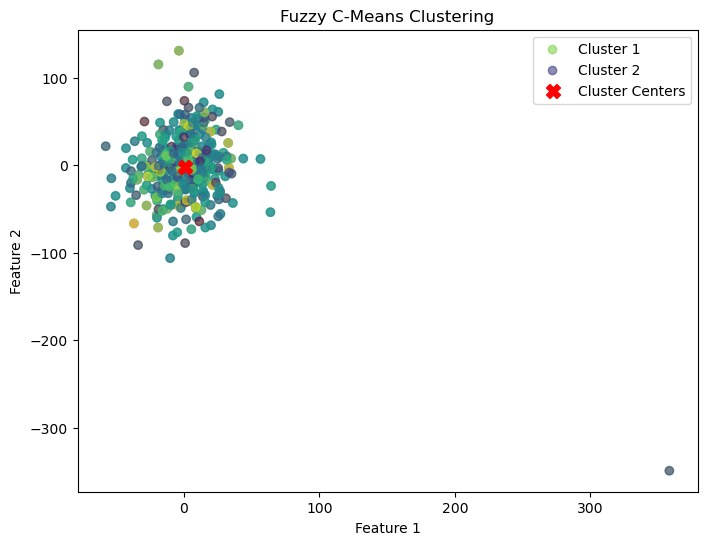

In [664]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

n_clusters = 2

cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X_pca_optimal, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

hard_clusters = np.argmax(u, axis=0)

print("Cluster Centers:\n", cntr)
print("\nFuzzy Membership Matrix (first 5 data points):\n", u[:, :5])

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(n_clusters):
    ax.scatter(X_pca_optimal[0], X_pca_optimal[1], c=u[i], alpha=0.6, label=f'Cluster {i+1}')

ax.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

ax.set_title('Fuzzy C-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
plt.show()


Cluster Centers:
 [[-2.85821672e-01 -4.97616964e-03  3.63670641e-03  1.43220503e-04
  -4.67345590e-04 -7.34072806e-04 -7.23315537e-03  2.16679163e-03
  -6.80511973e-04  1.18932544e-03  8.29287526e-04 -1.20685729e-03
  -2.36335038e-03 -7.07642274e-05  1.38254870e-03  3.30669671e-04
  -1.96438441e-04  2.61040539e-04 -5.73788131e-04  3.41589291e-04
  -3.23023308e-04 -2.50926294e-05 -1.25854073e-04 -1.59299718e-03
   1.78574493e-03 -4.03035042e-04  1.19197527e-03  1.26705621e-03
  -1.80954317e-03 -1.32219919e-03 -8.62638036e-04  7.91938987e-04
  -1.13773835e-04 -9.15999127e-04  4.99029597e-04 -3.73297325e-04
   3.80312120e-04  4.41621270e-04 -9.67131919e-04 -3.55322631e-04
   7.36026486e-04  5.96558379e-04  2.96791744e-05 -9.82601684e-05
  -5.85590695e-04 -8.36514171e-05 -2.32760665e-04 -3.34853321e-04
  -2.52298524e-05 -8.37284134e-04 -7.72508181e-05 -1.72415422e-04
  -1.06048658e-04  3.54785543e-04 -1.14579359e-03  6.34663942e-04
  -2.57532491e-04  4.17253038e-04 -8.91954518e-05  5.73214

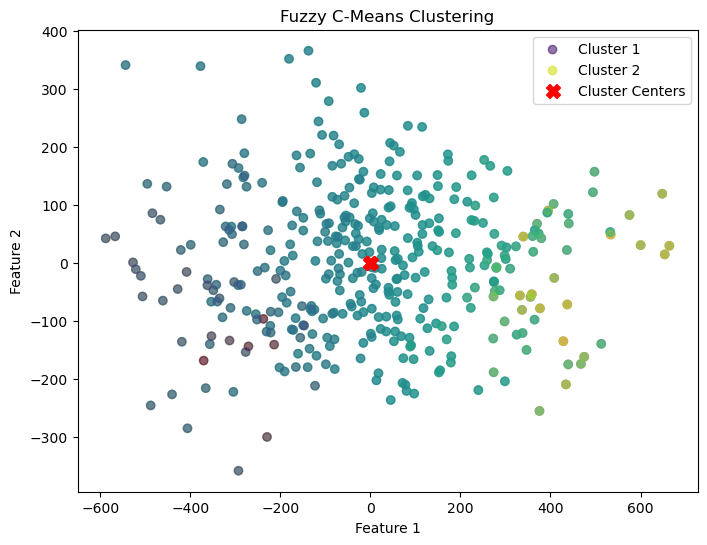

In [666]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

n_clusters = 2

# Transpose data for FCM
X_fcm = X_pca_optimal.T

# Run fuzzy c-means clustering
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X_fcm, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

# Convert fuzzy memberships to hard labels
hard_clusters = np.argmax(u, axis=0)

print("Cluster Centers:\n", cntr)
print("\nFuzzy Membership Matrix (first 5 data points):\n", u[:, :5])

# Plot soft membership coloring for each cluster
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(n_clusters):
    ax.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], c=u[i], alpha=0.6, label=f'Cluster {i+1}')

# Plot cluster centers
ax.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='X', s=100, label='Cluster Centers')

ax.set_title('Fuzzy C-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
plt.show()


In [74]:
original_data = pd.read_pickle("finaldata.pkl")
original_data

,file_name,bpm,key,scale,key_strength,mel_vector,spectral_centroid,mood
0,Lobo Loco - Blues about Mary Roose (ID 1153).mp3,136.496384,D,minor,0.857395,"[-54.037674, -57.166718, -59.026573, -55.1363,...",1362.012894,RM
1,Raya Brass Band - Banetero Kolo.mp3,163.957520,F,major,0.691950,"[-38.56755, -39.3003, -26.486628, -17.95028, -...",2397.921051,EH
2,Jazzafari - 3 in Raw.mp3,124.108849,F#,minor,0.795335,"[-17.787302, -12.299484, -14.487415, -26.54537...",4164.553630,EH
3,LASERS - Paris.mp3,140.006027,F,major,0.877331,"[-33.98225, -33.076958, -39.938587, -47.852196...",2470.489356,RM
4,Tipsy Oxcart - Bairski Vez.mp3,96.518738,D,minor,0.860609,"[-20.63337, -12.989651, -13.519527, -14.349524...",2448.152327,EH
...,...,...,...,...,...,...,...,...
383,Double-F the King - Dodo.mp3,112.639099,Ab,minor,0.889024,"[-18.827925, -25.420973, -36.458878, -23.00911...",3506.779658,EM
384,Jon Shuemaker - City of the Sun.mp3,129.622253,D,minor,0.757552,"[-58.46074, -75.745544, -80.0, -80.0, -80.0, -...",2502.325830,EM
385,ish10 yow1r0 - the white feathers of a little ...,139.661774,C,minor,0.743649,"[-14.860222, -8.845776, -7.3702717, -7.4669533...",1373.575122,RM
386,Till Paradiso - Friends will be Friends (TP 70...,129.799957,F,minor,0.809095,"[-48.618004, -45.304626, -47.979183, -46.861, ...",2953.987867,RH


In [686]:
Y_cluster = data.iloc[:, -16:]
Y_cluster

,bpm,key_strength,spectral_centroid,key_Ab,key_B,key_Bb,key_C,key_C#,key_D,key_E,key_Eb,key_F,key_F#,key_G,scale_minor,mood_encoded
0,136.496384,0.857395,1362.012894,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
1,163.957520,0.691950,2397.921051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,124.108849,0.795335,4164.553630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,140.006027,0.877331,2470.489356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
4,96.518738,0.860609,2448.152327,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,112.639099,0.889024,3506.779658,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
384,129.622253,0.757552,2502.325830,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
385,139.661774,0.743649,1373.575122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
386,129.799957,0.809095,2953.987867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0


In [688]:
Y_cluster = Y_cluster.drop(columns=["mood_encoded"])
Y_cluster

,bpm,key_strength,spectral_centroid,key_Ab,key_B,key_Bb,key_C,key_C#,key_D,key_E,key_Eb,key_F,key_F#,key_G,scale_minor
0,136.496384,0.857395,1362.012894,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,163.957520,0.691950,2397.921051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,124.108849,0.795335,4164.553630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,140.006027,0.877331,2470.489356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,96.518738,0.860609,2448.152327,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,112.639099,0.889024,3506.779658,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
384,129.622253,0.757552,2502.325830,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
385,139.661774,0.743649,1373.575122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
386,129.799957,0.809095,2953.987867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [730]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1️⃣ Normalize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Y_cluster)  # Use already prepared X_cluster

# 2️⃣ Choose the number of clusters (try adjusting `n_clusters`)
n_clusters = 12# Can be changed based on Elbow Method or domain knowledge

# 3️⃣ Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
Y_cluster.loc[:, "Cluster"] = kmeans.fit_predict(X_scaled)  # Correct way
# 4️⃣ Display cluster counts
print(Y_cluster["Cluster"].value_counts())

# 5️⃣ Show the dataset with cluster labels
print(Y_cluster.head())


Cluster
1     74
5     52
2     44
10    41
0     35
3     34
8     23
11    22
9     19
6     17
4     14
7     13
Name: count, dtype: int64
          bpm  key_strength  spectral_centroid  key_Ab  key_B  key_Bb  key_C  \
0  136.496384      0.857395        1362.012894     0.0    0.0     0.0    0.0   
1  163.957520      0.691950        2397.921051     0.0    0.0     0.0    0.0   
2  124.108849      0.795335        4164.553630     0.0    0.0     0.0    0.0   
3  140.006027      0.877331        2470.489356     0.0    0.0     0.0    0.0   
4   96.518738      0.860609        2448.152327     0.0    0.0     0.0    0.0   

   key_C#  key_D  key_E  key_Eb  key_F  key_F#  key_G  scale_minor  Cluster  
0     0.0    1.0    0.0     0.0    0.0     0.0    0.0          1.0       10  
1     0.0    0.0    0.0     0.0    1.0     0.0    0.0          0.0        2  
2     0.0    0.0    0.0     0.0    0.0     1.0    0.0          1.0        9  
3     0.0    0.0    0.0     0.0    1.0     0.0    0.0          0.

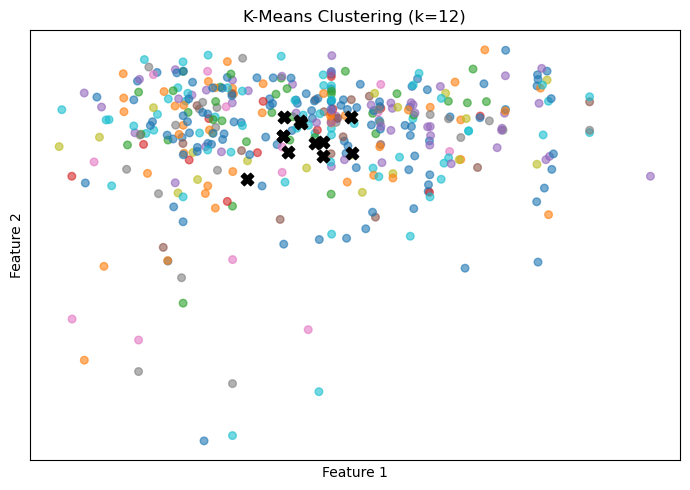

In [732]:
plt.figure(figsize=(7, 5))

# Plot data points colored by cluster
plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1],
    c=Y_cluster["Cluster"], cmap="tab10", s=30, alpha=0.6
)

# Plot cluster centers
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    c='black', marker='X', s=80
)

plt.title(f'K-Means Clustering (k={n_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()



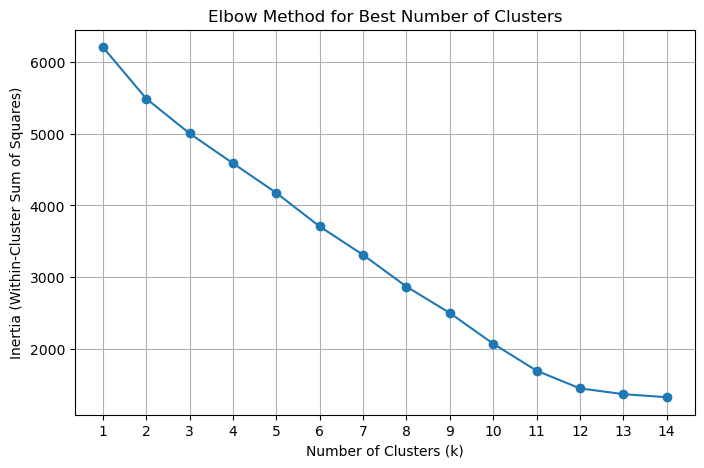

In [762]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of cluster numbers to try
inertia_values = []
cluster_range = range(1, 15)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)  # Sum of squared distances to cluster centers

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Best Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


In [738]:
cluster_summary = Y_cluster.groupby("Cluster").mean()
print(cluster_summary)


                bpm  key_strength  spectral_centroid  key_Ab  key_B  key_Bb  \
Cluster                                                                       
0        124.111318      0.799073        2552.106845     0.0    0.0     0.0   
1        113.870184      0.850932        2402.810488     0.0    0.0     0.0   
2        110.153986      0.828520        2489.653581     0.0    0.0     0.0   
3        110.510986      0.859913        2426.926872     0.0    0.0     0.0   
4        110.259972      0.828204        2689.478329     0.0    0.0     0.0   
5        124.018555      0.861320        2488.817668     0.0    0.0     0.0   
6        118.329284      0.818068        2336.945824     0.0    1.0     0.0   
7        102.852804      0.753057        2602.493737     0.0    0.0     0.0   
8        111.143753      0.799498        2695.376920     0.0    0.0     1.0   
9        116.661195      0.815775        2781.734479     0.0    0.0     0.0   
10       113.684932      0.853268        2590.202912

In [739]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, Y_cluster["Cluster"])
print("Silhouette Score:", score)


Silhouette Score: 0.4227409747408606


Cluster
3     74
11    52
1     44
10    41
0     35
5     34
4     23
9     22
8     19
6     17
2     14
7     13
Name: count, dtype: int64
          bpm  key_strength  spectral_centroid  key_Ab  key_B  key_Bb  key_C  \
0  136.496384      0.857395        1362.012894     0.0    0.0     0.0    0.0   
1  163.957520      0.691950        2397.921051     0.0    0.0     0.0    0.0   
2  124.108849      0.795335        4164.553630     0.0    0.0     0.0    0.0   
3  140.006027      0.877331        2470.489356     0.0    0.0     0.0    0.0   
4   96.518738      0.860609        2448.152327     0.0    0.0     0.0    0.0   

   key_C#  key_D  key_E  key_Eb  key_F  key_F#  key_G  scale_minor  Cluster  
0     0.0    1.0    0.0     0.0    0.0     0.0    0.0          1.0       10  
1     0.0    0.0    0.0     0.0    1.0     0.0    0.0          0.0        1  
2     0.0    0.0    0.0     0.0    0.0     1.0    0.0          1.0        8  
3     0.0    0.0    0.0     0.0    1.0     0.0    0.0          0.

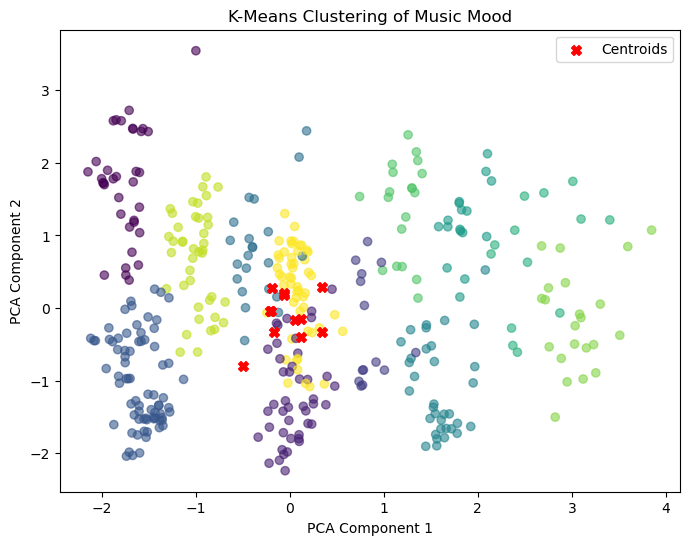

                bpm  key_strength  spectral_centroid  key_Ab  key_B  key_Bb  \
Cluster                                                                       
0        124.111318      0.799073        2552.106845     0.0    0.0     0.0   
1        110.153986      0.828520        2489.653581     0.0    0.0     0.0   
2        110.259972      0.828204        2689.478329     0.0    0.0     0.0   
3        113.870184      0.850932        2402.810488     0.0    0.0     0.0   
4        111.143753      0.799498        2695.376920     0.0    0.0     1.0   
5        110.510986      0.859913        2426.926872     0.0    0.0     0.0   
6        118.329284      0.818068        2336.945824     0.0    1.0     0.0   
7        102.852804      0.753057        2602.493737     0.0    0.0     0.0   
8        116.661195      0.815775        2781.734479     0.0    0.0     0.0   
9        118.246696      0.792741        2924.834049     1.0    0.0     0.0   
10       113.684932      0.853268        2590.202912

In [794]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1️⃣ Normalize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Y_cluster)  # Use already prepared X_cluster

# 2️⃣ Choose the number of clusters (try adjusting `n_clusters`)
n_clusters = 12  # Can be changed based on Elbow Method or domain knowledge

# 3️⃣ Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
Y_cluster.loc[:, "Cluster"] = kmeans.fit_predict(X_scaled)  # Correct way
# 4️⃣ Display cluster counts
print(Y_cluster["Cluster"].value_counts())

# 5️⃣ Show the dataset with cluster labels
print(Y_cluster.head())

from sklearn.decomposition import PCA

# 1️⃣ Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2️⃣ Extract cluster labels
clusters = Y_cluster["Cluster"]

# 3️⃣ Create scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker="X", s=50, c="red", label="Centroids")

plt.title("K-Means Clustering of Music Mood")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

cluster_summary = Y_cluster.groupby("Cluster").mean()
print(cluster_summary)

#Evaluation Metrix
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, Y_cluster["Cluster"])
print("Silhouette Score:", score)



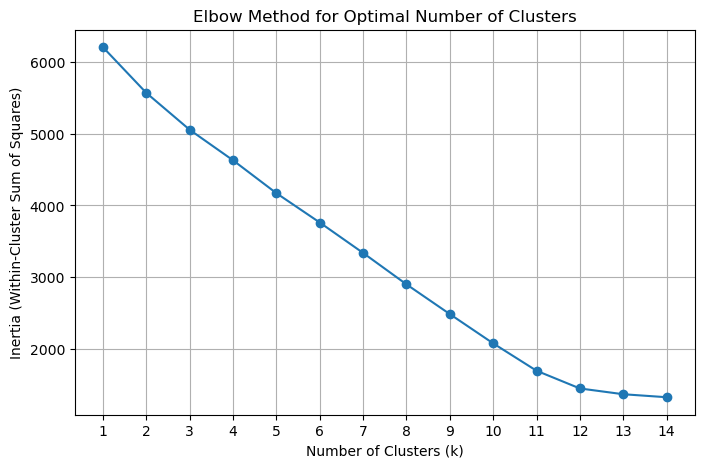

In [756]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of cluster numbers to try
inertia_values = []
cluster_range = range(1, 15)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)  # Sum of squared distances to cluster centers

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


In [760]:
score = silhouette_score(X_scaled, Y_cluster["Cluster"])
print("Silhouette Score:", score)


Silhouette Score: 0.4403662391561511


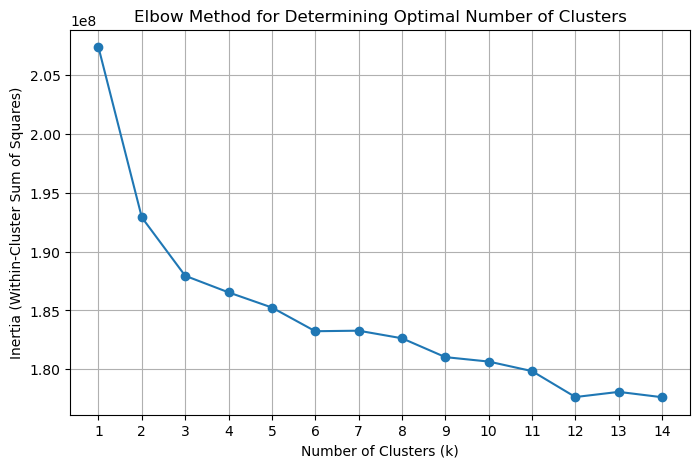

In [788]:
# Define a range of cluster numbers to test
value = []
number_of_clusters = range(1, 15)

for num_clusters in number_of_clusters:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans_model.fit(X_pca_optimal)
    value.append(kmeans_model.inertia_)  # Sum of squared distances to cluster centers

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(number_of_clusters, value, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(number_of_clusters)
plt.grid(True)
plt.show()
